<a href="https://colab.research.google.com/github/AkhmadRamadani/PCVK-2025-PUBLIC/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Akhmad Ramadani

NIM: 245107080002

# D-1 PERCOBAAN HISTOGRAM

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

In [5]:
img = cv.imread('/content/drive/MyDrive/PCVK/Week5/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

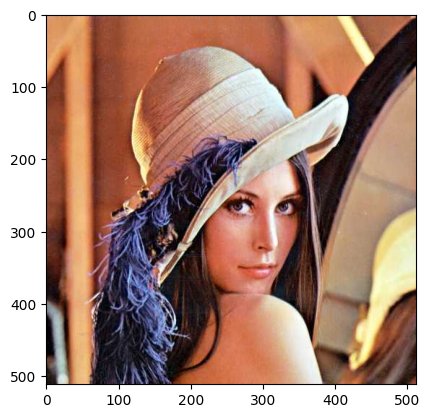

In [6]:
plt.imshow(img)

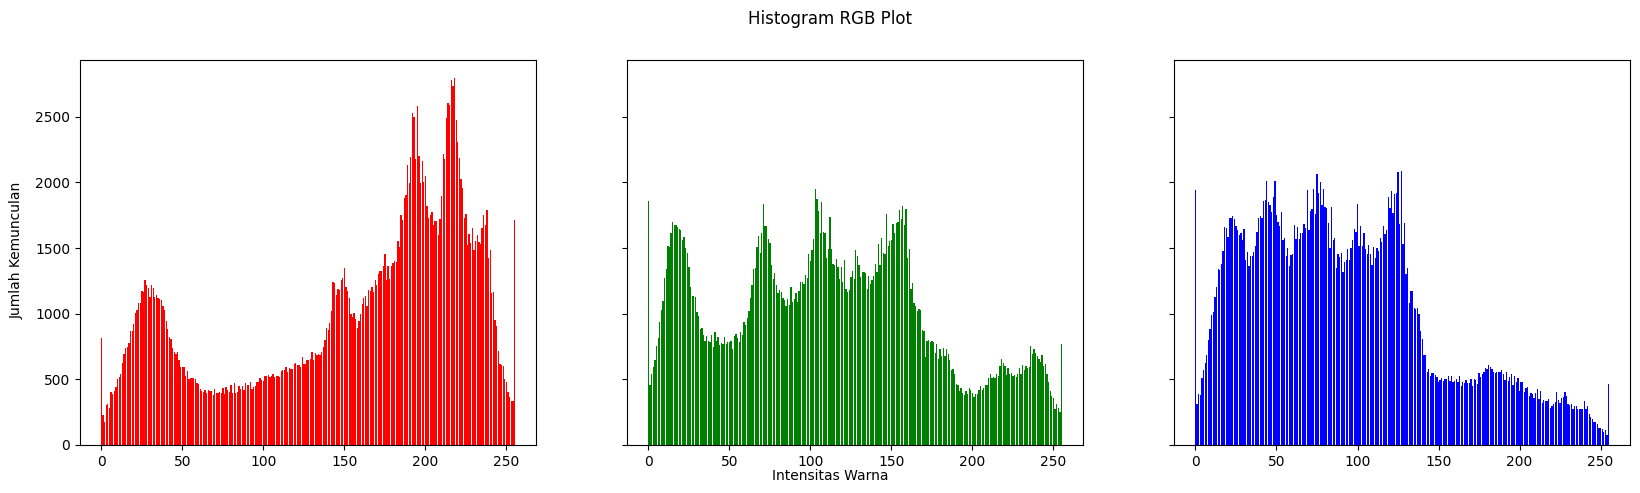

In [7]:
height, width, depth = np.shape(img)

names = np.arange(256)
red = [0] * 256
green = [0] * 256
blue = [0] * 256

for y in range(height):
    for x in range(width):
        r, g, b = img[y][x]
        red[r] += 1
        green[g] += 1
        blue[b] += 1

fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharex=True, sharey=True)
fig.suptitle('Histogram RGB Plot')

fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

plt.show()


## PERTANYAAN PRAKTIKUM D1

1. Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

- Sama

In [8]:
def show_image_histogram_numpy(img):
    red, _ = np.histogram(img[:,:,0], bins=256, range=(0, 255))
    green, _ = np.histogram(img[:,:,1], bins=256, range=(0, 255))
    blue, _ = np.histogram(img[:,:,2], bins=256, range=(0, 255))

    plt.figure(figsize=(25,5))
    plt.subplot(1,3,1)
    plt.bar(range(256), red, color='r', width=1)
    plt.title('Red channel')

    plt.subplot(1,3,2)
    plt.bar(range(256), green, color='g', width=1)
    plt.title('Green channel')

    plt.subplot(1,3,3)
    plt.bar(range(256), blue, color='b', width=1)
    plt.title('Blue channel')

    plt.show()

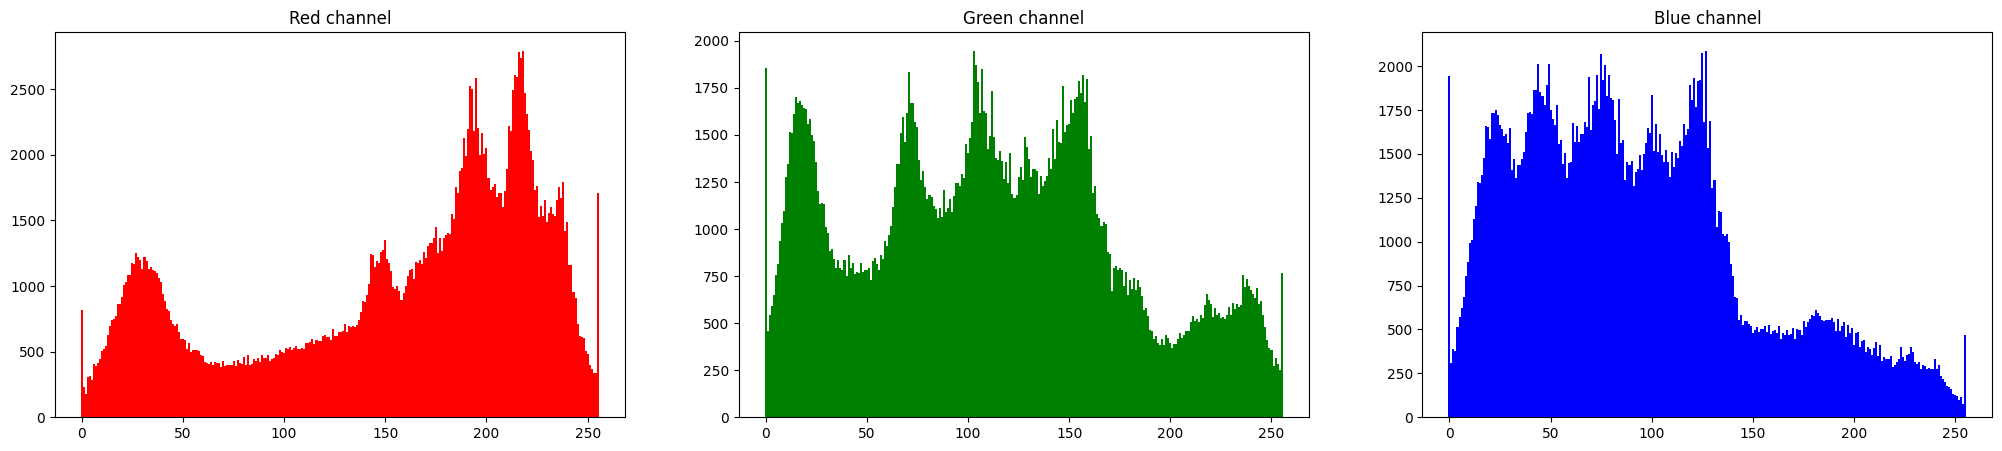

In [9]:
show_image_histogram_numpy(img)

2. Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg. Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung
gelap, terang, atau kontras rendah.


* **Ketiga kanal (R, G, B)** menunjukkan bahwa sebagian besar nilai intensitas piksel terkonsentrasi di **daerah kanan (mendekati 255)**.
* Artinya, **nilai intensitas tinggi mendominasi**, baik di kanal merah, hijau, maupun biru.
* Tidak tampak banyak piksel di area nilai rendah (0–100), yang berarti **jarang ada area gelap** dalam gambar.
* Selain itu, kurva histogram tampak **menumpuk di ujung kanan dengan sedikit variasi di tengah**, menandakan **rentang intensitas yang sempit**.

**Sehingga, bisa disimpulkan:**

* **Gambar cenderung terang**, karena mayoritas piksel memiliki nilai intensitas tinggi.
* **Kontras relatif rendah**, sebab distribusi tidak merata di seluruh rentang 0–255—piksel terkonsentrasi di area terang tanpa penyebaran yang kuat ke area gelap.

In [10]:
def show_image_histogram(img):
    height, width, depth = img.shape

    red = np.zeros((256,))
    green = np.zeros((256,))
    blue = np.zeros((256,))
    for y in range(0, height):
        for x in range(0, width):
            r, g, b = img[y, x]
            red[r] += 1
            green[g] += 1
            blue[b] += 1

    plt.figure(figsize=(25,5))
    plt.subplot(1,3,1)
    plt.bar(range(256), red, color='r', width=1)
    plt.title('Red channel')

    plt.subplot(1,3,2)
    plt.bar(range(256), green, color='g', width=1)
    plt.title('Green channel')

    plt.subplot(1,3,3)
    plt.bar(range(256), blue, color='b', width=1)
    plt.title('Blue channel')

    plt.show()


In [11]:
img_ktm_lama = cv.imread('/content/drive/MyDrive/PCVK/Week5/KTM lama.jpg')
img_ktm_lama = cv.cvtColor(img_ktm_lama, cv.COLOR_BGR2RGB)

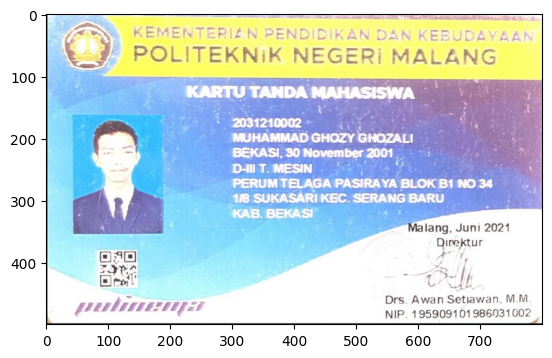

In [12]:
plt.imshow(img_ktm_lama)

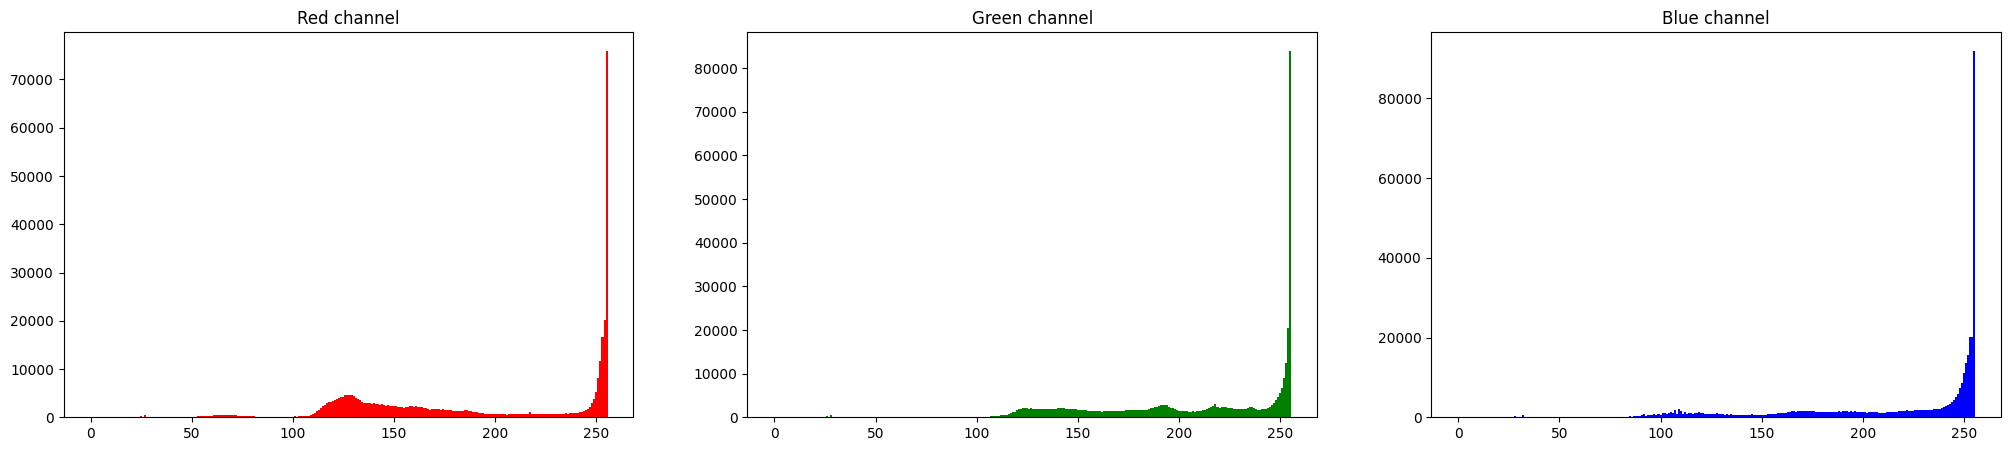

In [13]:
show_image_histogram(img_ktm_lama)

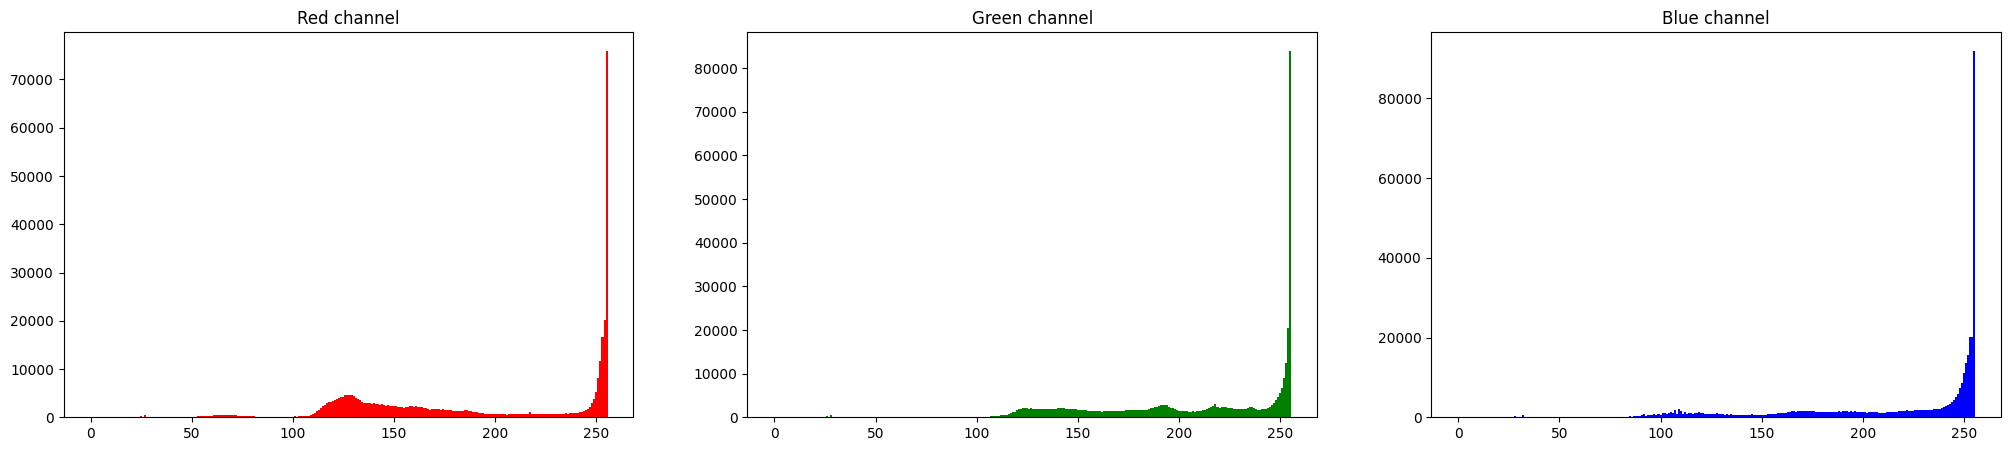

In [14]:
show_image_histogram_numpy(img_ktm_lama)

# D-2 PERCOBAAN HISTOGRAM EQUALIZATION

In [ ]:
def get_histogram(img):
    height, width, depth = img.shape
    ax = np.zeros((3, 256))
    for y in range(height):
        for x in range(width):
            ax[0][img[y][x][0]] += 1
            ax[1][img[y][x][1]] += 1
            ax[2][img[y][x][2]] += 1
    return ax

def histogram_equalization(img):
    channels = cv.split(img)
    eq_channels = []

    for ch in channels:
        hist = np.bincount(ch.flatten(), minlength=256)
        num_px = np.sum(hist)

        hist = hist / num_px

        cdf = np.cumsum(hist)

        transform_map = np.floor(255 * cdf).astype(np.uint8)

        eq_ch = transform_map[ch]
        eq_channels.append(eq_ch)

    eq_img = cv.merge(eq_channels)

    return eq_img

In [ ]:
img_lena_lc = cv.imread('/content/drive/MyDrive/PCVK/Week5/lena_lc.jpg')
img_lena_lc = cv.cvtColor(img_lena_lc, cv.COLOR_BGR2RGB)

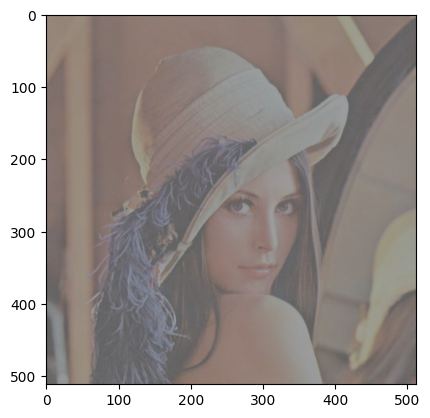

In [ ]:
plt.imshow(img_lena_lc)

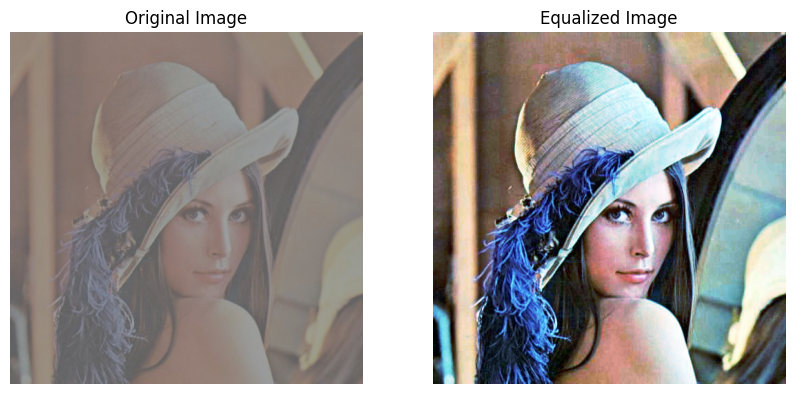

In [ ]:
eq_img = histogram_equalization(img_lena_lc)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_lena_lc)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(eq_img)
plt.title("Equalized Image")
plt.axis("off")
plt.show()

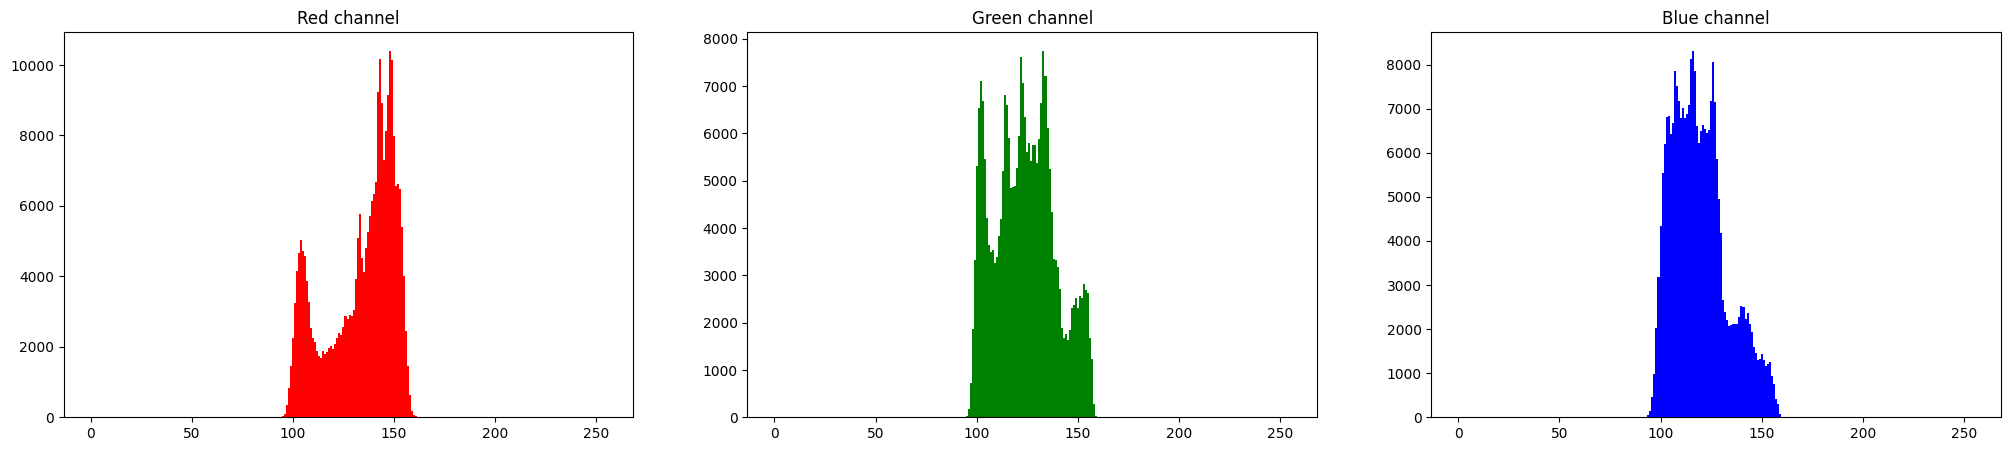

In [ ]:
show_image_histogram(img_lena_lc)

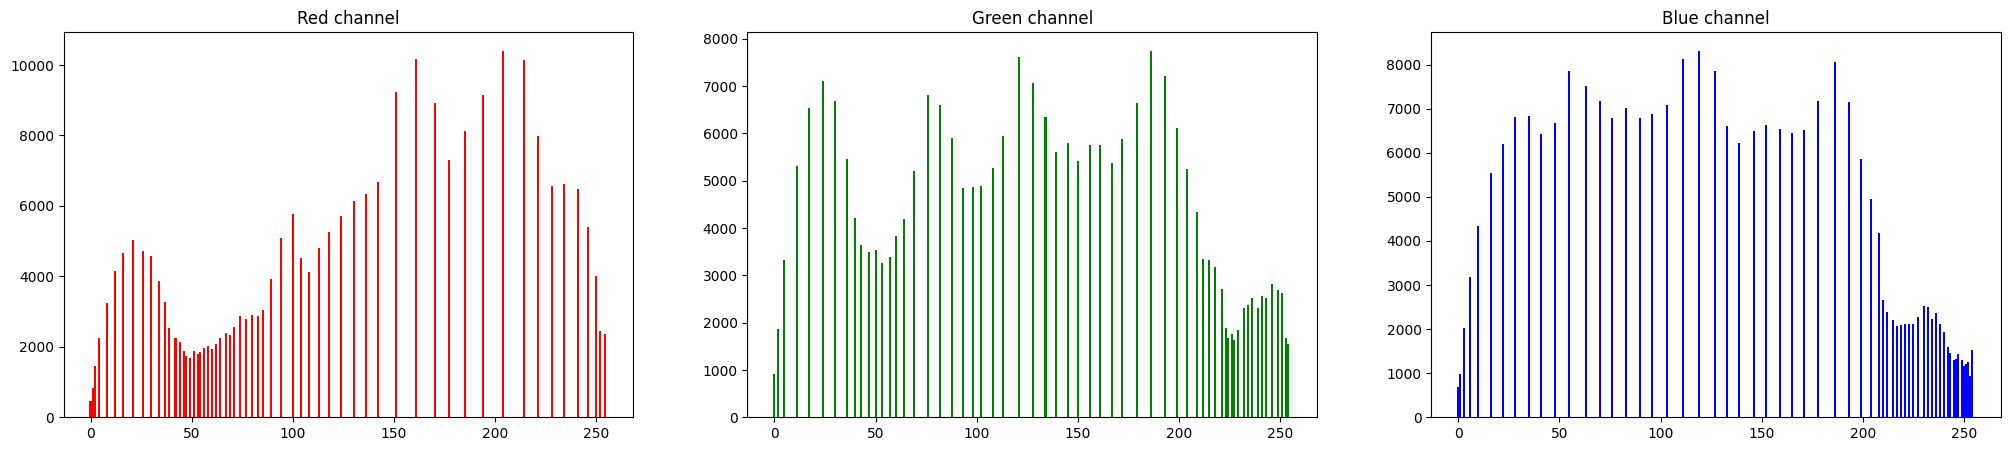

In [ ]:
show_image_histogram(eq_img)

In [ ]:
def cv2_histogram_equalization(img):
    r, g, b = cv.split(img)

    r_eq = cv.equalizeHist(r)
    g_eq = cv.equalizeHist(g)
    b_eq = cv.equalizeHist(b)

    img_eq = cv.merge([r_eq, g_eq, b_eq])

    return img_eq

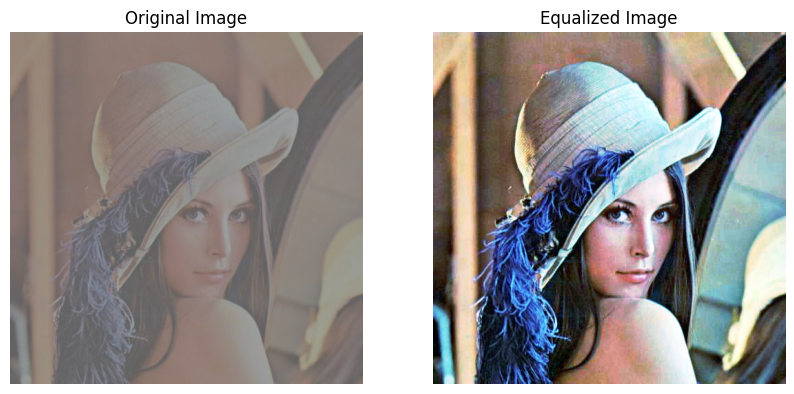

In [ ]:
eq_cv2_img = cv2_histogram_equalization(img_lena_lc)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_lena_lc)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(eq_cv2_img)
plt.title("Equalized Image")
plt.axis("off")
plt.show()

2. Setelah mengerjakan langkah no. 1, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist” seperti pada
potongan kode berikut ini. Lengkapi potongan kode tersebut! Bandingkan hasilnya. Apakah output muncul sama?

- Sama

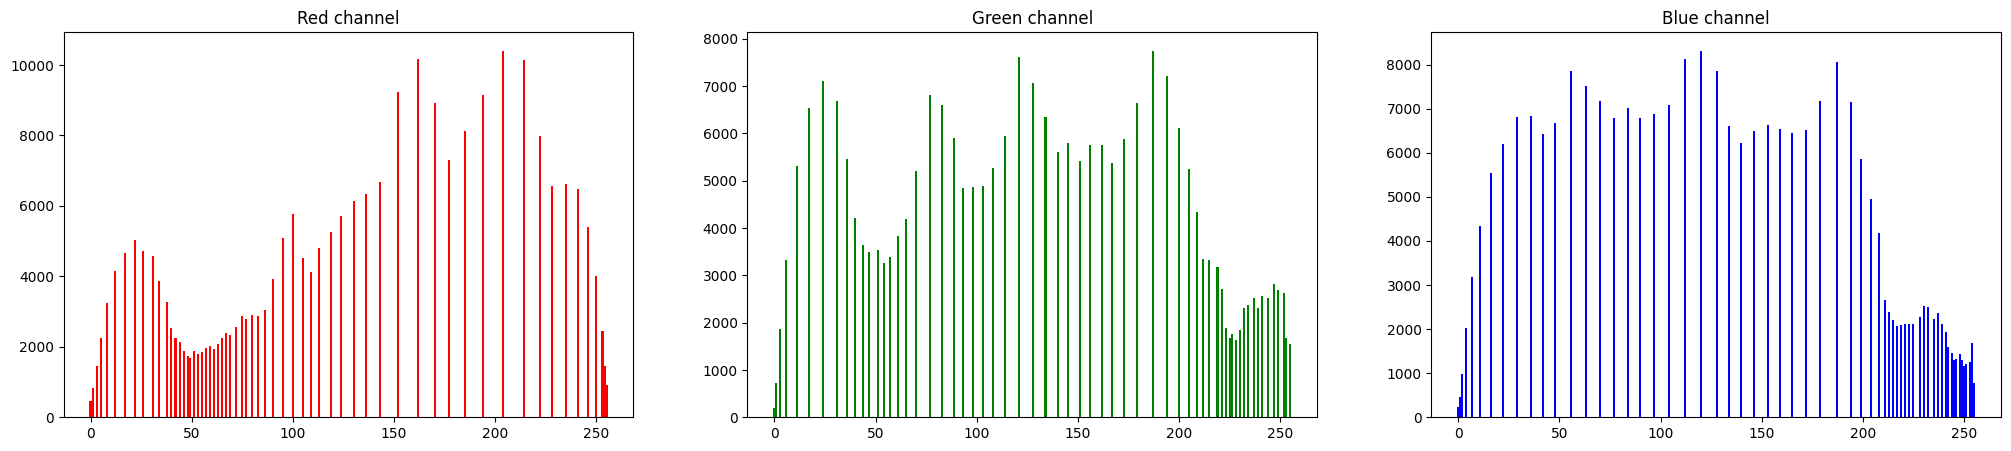

In [ ]:
show_image_histogram(eq_cv2_img)

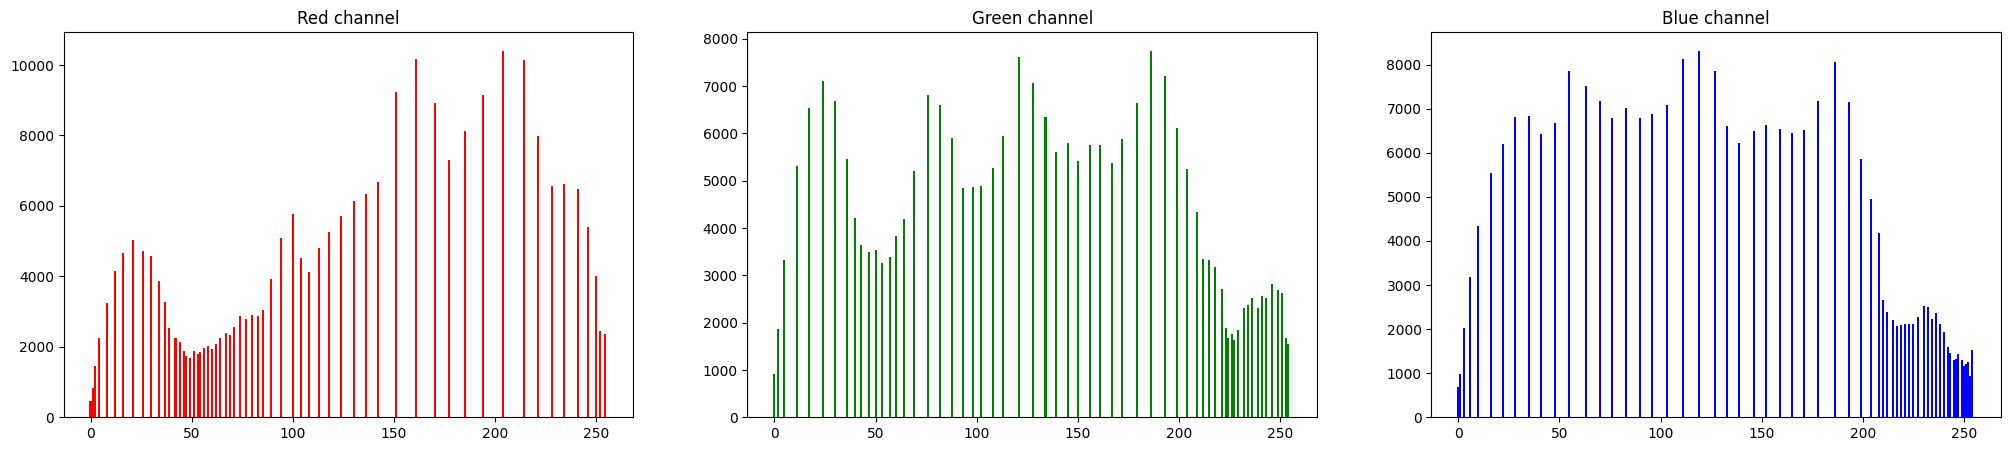

In [ ]:
show_image_histogram(eq_img)

## PERTANYAAN PRAKTIKUM D2

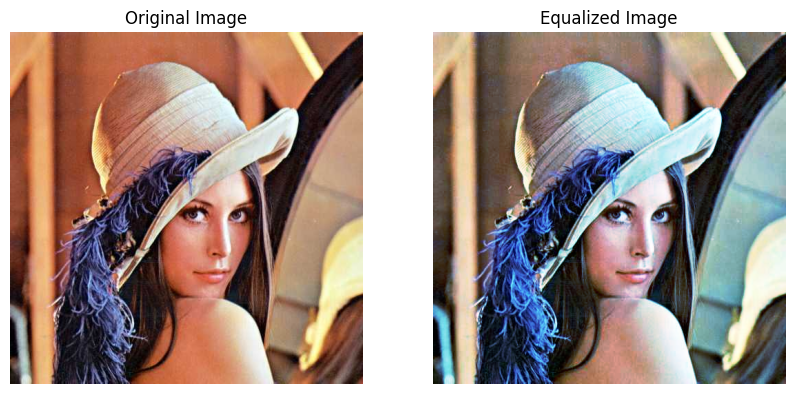

In [ ]:
eq_lena_img = cv2_histogram_equalization(img)


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(eq_lena_img)
plt.title("Equalized Image")
plt.axis("off")
plt.show()

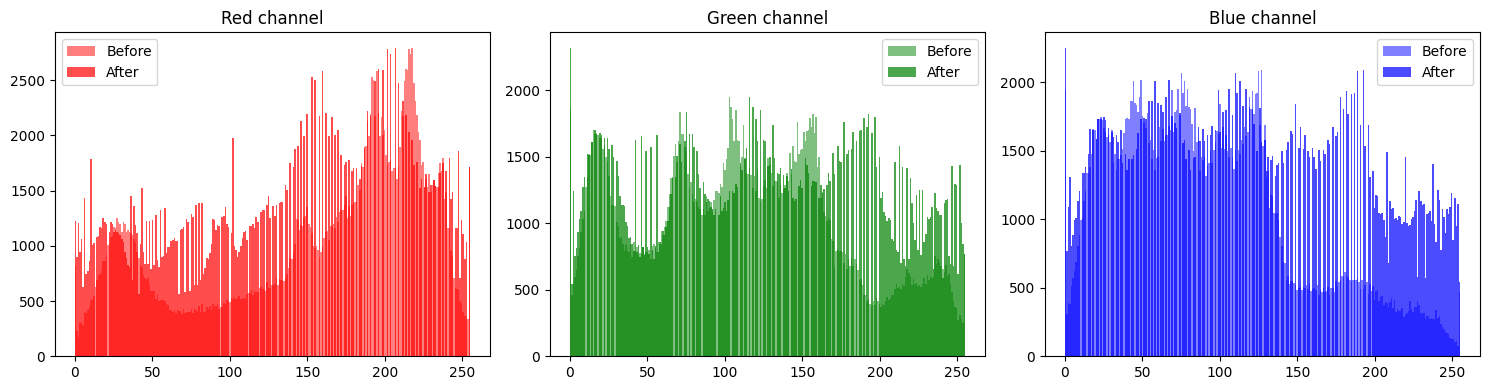

In [ ]:
def plot_histograms(original, equalized):
    colors = ('red', 'green', 'blue')
    plt.figure(figsize=(15, 4))
    for i, col in enumerate(colors):
        plt.subplot(1, 3, i+1)
        plt.hist(original[:,:,i].flatten(), bins=256, color=col, alpha=0.5, label='Before')
        plt.hist(equalized[:,:,i].flatten(), bins=256, color=col, alpha=0.7, label='After')
        plt.title(f'{col.capitalize()} channel')
        plt.legend()
    plt.tight_layout()
    plt.show()

plot_histograms(img, eq_lena_img)

In [ ]:
def calculate_psnr(original, equalized):
    mse = np.mean((original.astype(np.float64) - equalized.astype(np.float64)) ** 2)
    if mse == 0:
        return float('inf')
    psnr = 10 * np.log10((255 ** 2) / mse)
    return psnr

In [ ]:
psnr_value = calculate_psnr(img, eq_lena_img)
print(f"PSNR antara citra asli dan hasil equalization: {psnr_value:.2f} dB")

PSNR antara citra asli dan hasil equalization: 17.95 dB


Nilai PSNR 17.95 dB termasuk rendah, menandakan perubahan visual signifikan.
Namun perubahan ini tidak selalu negatif; untuk equalization, itu wajar dan justru diharapkan.
Secara subjektif, citra hasil equalization biasanya memiliki kontras lebih baik dan detail lebih jelas, meski berbeda secara numerik dari citra aslinya.

2. Gunakan Citra KTM Lama.jpg

a. Terapkan histogram equalization pada citra KTM lama.jpg.

b. Tampilkan citra asli, citra hasil equalization, serta histogram keduanya dalam satu layout.

c. Bandingkan citra KTM lama.jpg sebelum dan sesudah histogram equalization.
Jelaskan perbedaan yang terlihat secara visual (misalnya pada detail wajah,
teks, atau latar belakang). Apakah perubahan tersebut meningkatkan kualitas
informasi dari citra atau justru membuat citra terlihat terlalu “keras”.

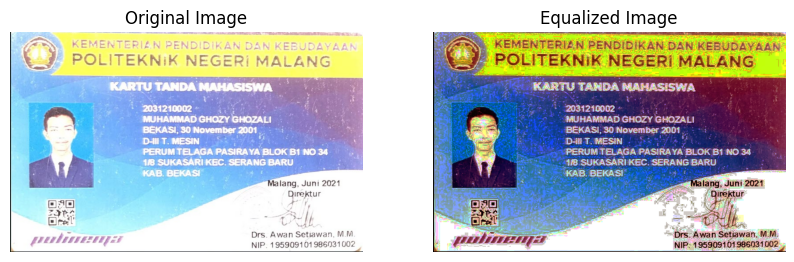

In [ ]:
eq_img_ktm_lama = cv2_histogram_equalization(img_ktm_lama)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_ktm_lama)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(eq_img_ktm_lama)
plt.title("Equalized Image")
plt.axis("off")
plt.show()

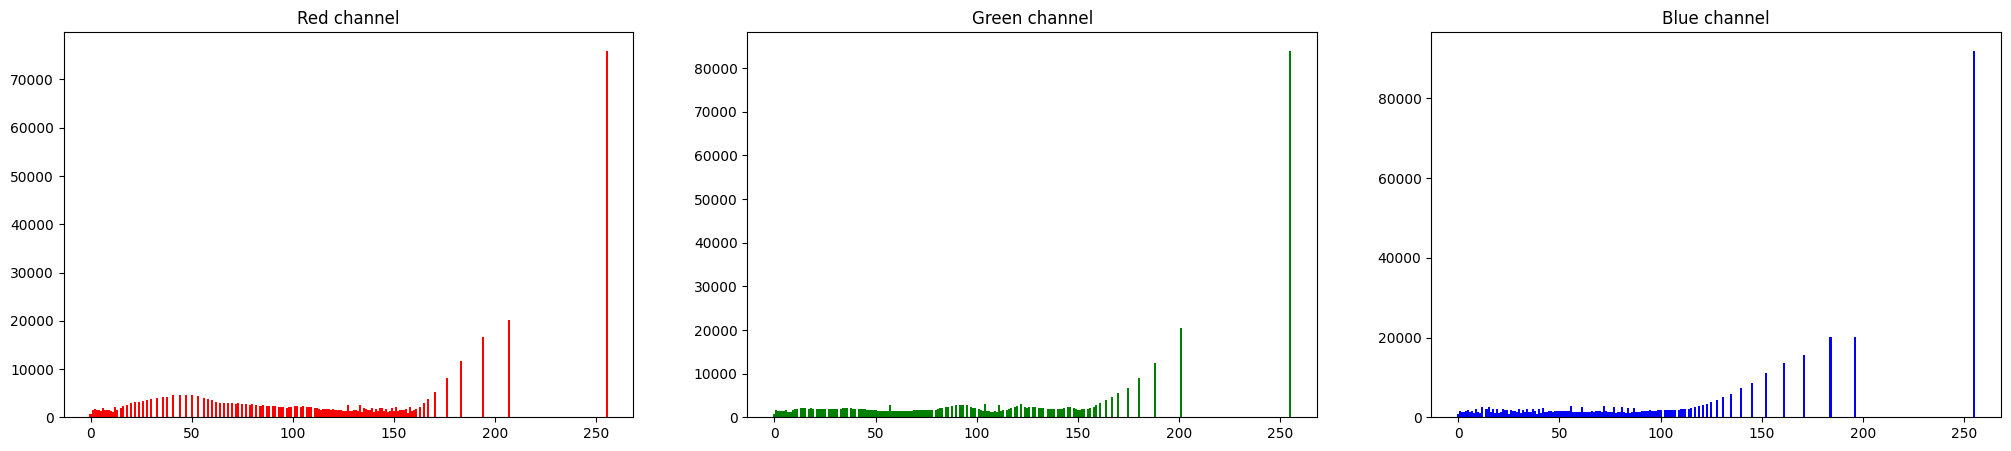

In [ ]:
show_image_histogram(eq_img_ktm_lama)

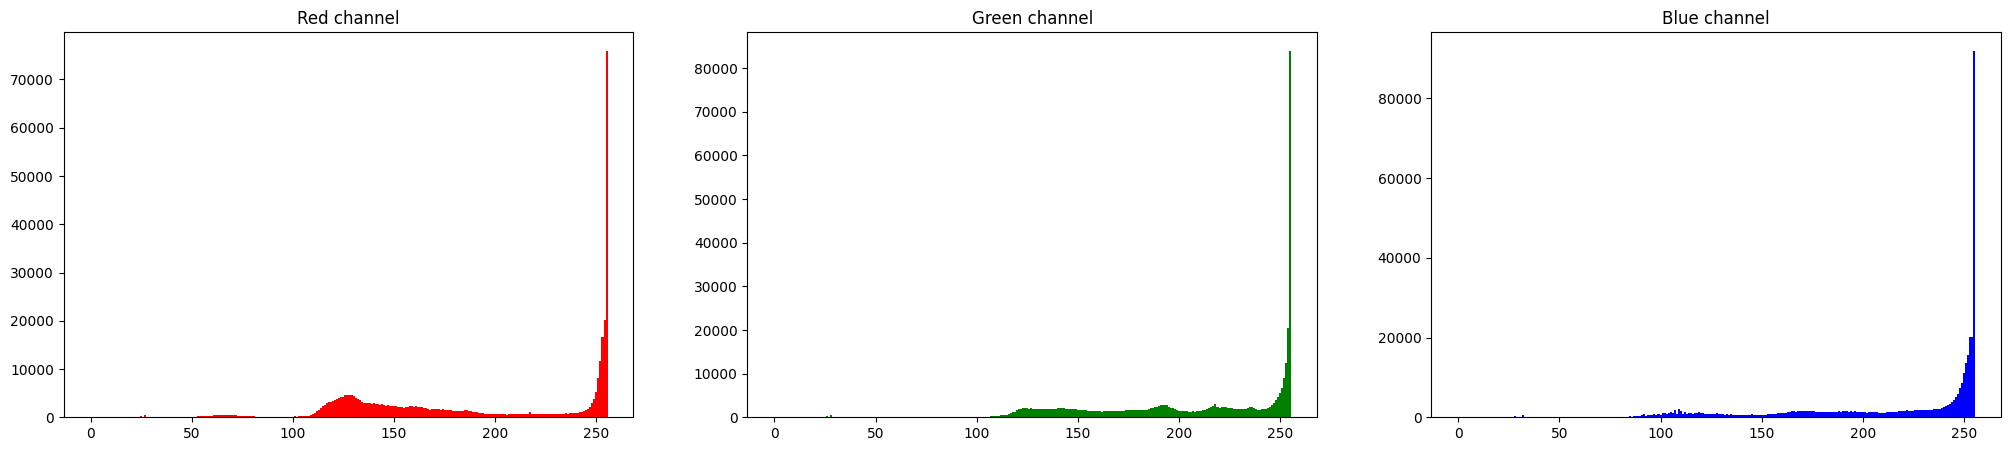

In [ ]:
show_image_histogram(img_ktm_lama)

Wajah terlihat lebih jelas, teks dan latar belakang lebih tidak silau, sehingga teks lebih mudah dibaca. Menurunkan kualitas, tetapi membuat teks lebih jelas, sehingga bisa diperuntukkan untuk preprocessing pada OCR.

# D-3 TUGAS PRAKTIKUM DITHERING


Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

In [ ]:
def dithering_floyd_steinberg(img):

    img = img.astype(np.float32)
    img_dither = np.zeros_like(img)

    height, width, _ = img.shape

    for y in range(height - 1):
        for x in range(width - 1):
            for c in range(3):
                old_val = img[y, x, c]
                new_val = 255 if old_val > 127 else 0
                img_dither[y, x, c] = new_val
                error = old_val - new_val

                if x + 1 < width:
                    img[y, x + 1, c] += error * 7 / 16
                if x - 1 >= 0 and y + 1 < height:
                    img[y + 1, x - 1, c] += error * 3 / 16
                if y + 1 < height:
                    img[y + 1, x, c] += error * 5 / 16
                if x + 1 < width and y + 1 < height:
                    img[y + 1, x + 1, c] += error * 1 / 16

    img_dither = np.clip(img_dither, 0, 255).astype(np.uint8)

    return img_dither

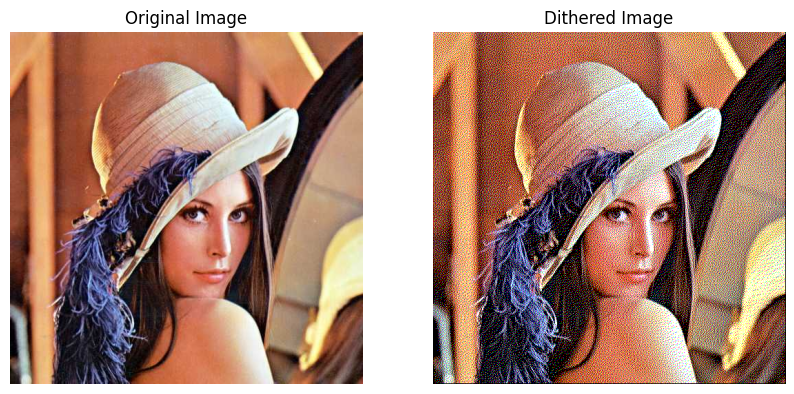

In [ ]:
img_lena_dithered = dithering_floyd_steinberg(img)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_lena_dithered)
plt.title("Dithered Image")
plt.axis("off")
plt.show()

Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!

In [ ]:
img_lena_lc_grey = cv.cvtColor(img_lena_lc, cv.COLOR_RGB2GRAY)
img_lena_lc_grey = cv.cvtColor(img_lena_lc_grey, cv.COLOR_GRAY2BGR)

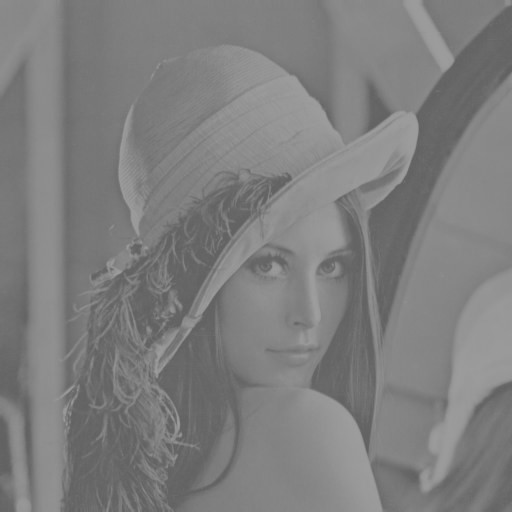

In [ ]:
cv2_imshow(img_lena_lc_grey)

In [ ]:
img_lena_grey_hist_eq = cv2_histogram_equalization(img_lena_lc_grey)

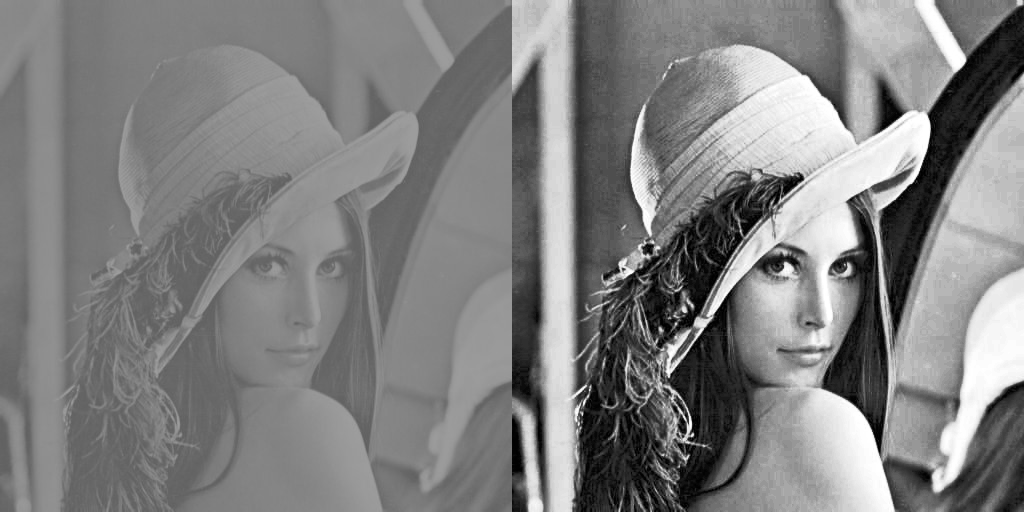

In [ ]:
final_frame = cv.hconcat((img_lena_lc_grey, img_lena_grey_hist_eq))
cv2_imshow(final_frame)

In [ ]:
img_lena_grey_hist_eq_dithered = dithering_floyd_steinberg(img_lena_grey_hist_eq)

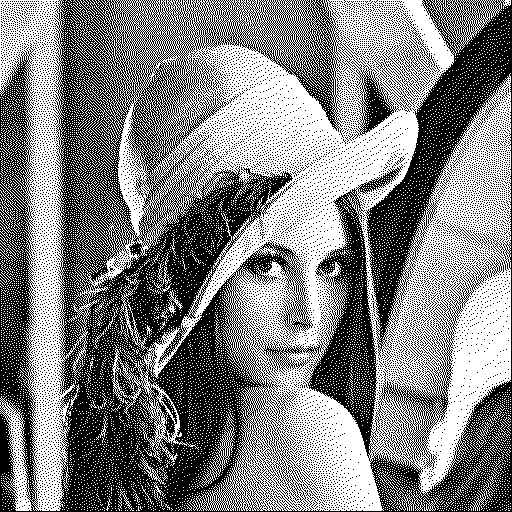

In [ ]:
cv2_imshow(img_lena_grey_hist_eq_dithered)

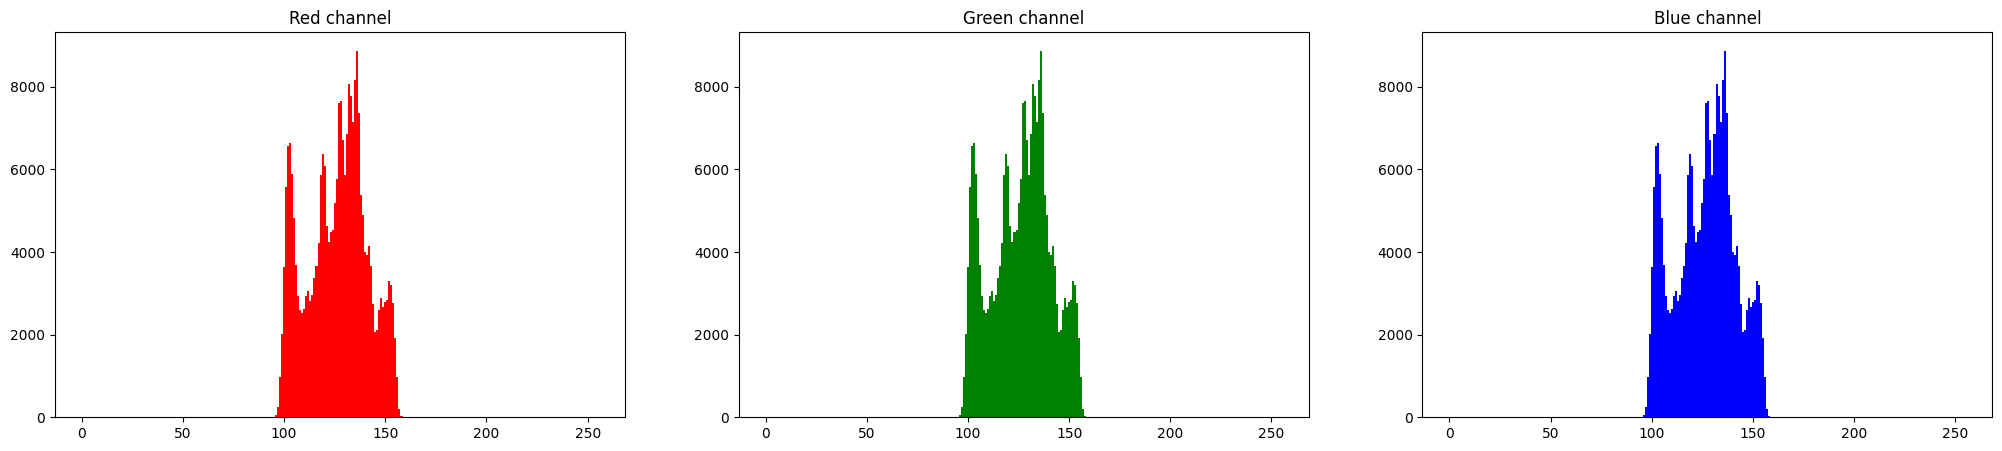

In [ ]:
show_image_histogram(img_lena_lc_grey)

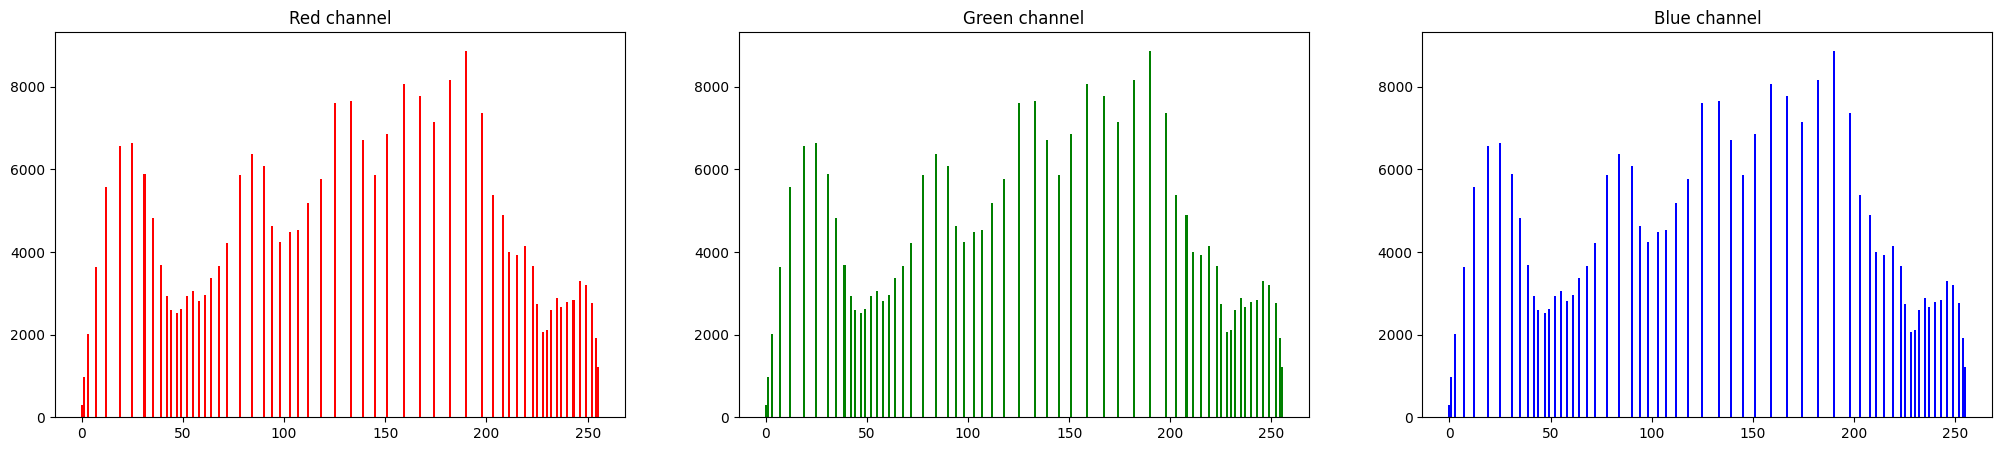

In [ ]:
show_image_histogram(img_lena_grey_hist_eq)

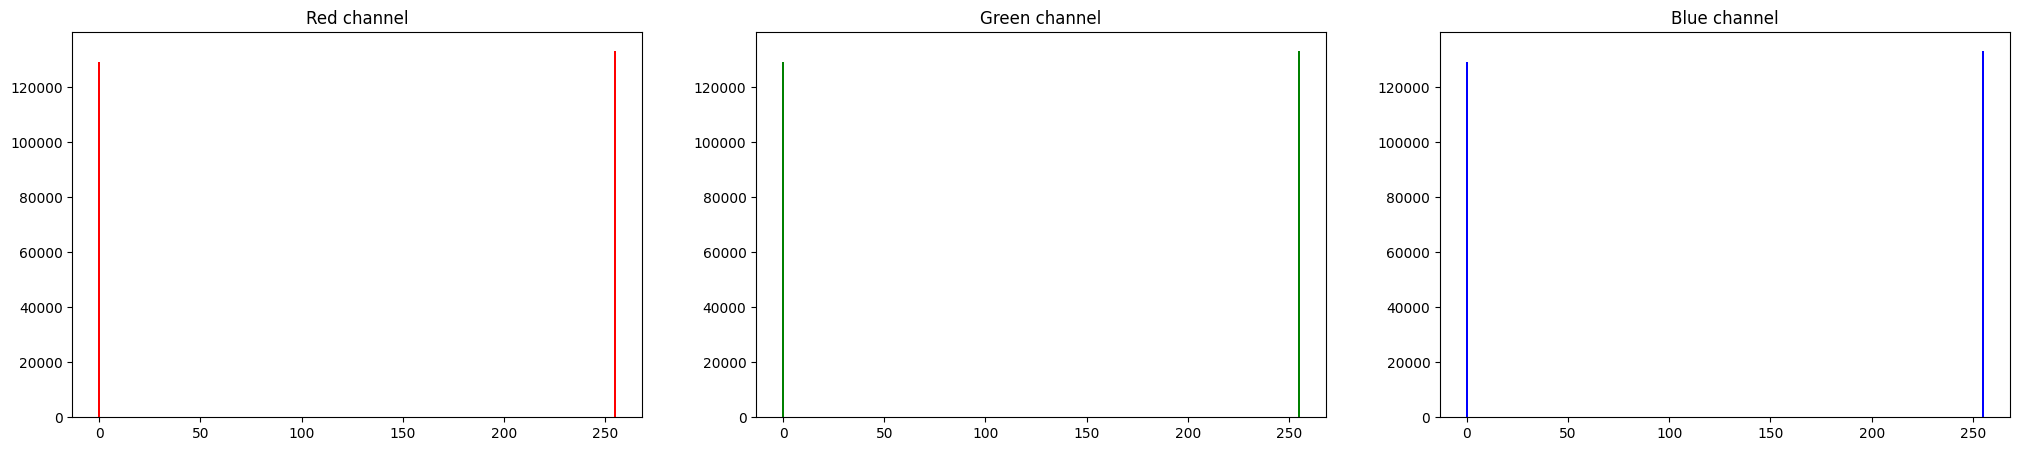

In [ ]:
show_image_histogram(img_lena_grey_hist_eq_dithered)

# TUGAS KELAS S2 MRTI

1. **Histogram Equalization**  
   Diberikan dua citra grayscale: citra pertama memiliki histogram dengan distribusi intensitas yang sempit (range 80-150), sedangkan citra kedua memiliki distribusi penuh (0-255).  
   • Analisis bagaimana hasil penerapan histogram equalization pada masing-masing citra.  
   • Jelaskan perbedaan dampaknya terhadap peningkatan kontras, serta kemungkinan munculnya artefak.  

   **Jawaban:**

   Jika citra memiliki distribusi intensitas sempit (misalnya hanya antara 8-150), penerapan histogram equalization akan memperluas rentang intensitas ke seluruh skala 0-255. Hasilnya, kontras meningkat secara signifikan karena area yang sebelumnya tampak abu-abu kini memiliki variasi terang dan gelap yang lebih kuat. Namun, karena awalnya data hanya sedikit di rentang intensitas sempit, perluasan ekstrem ini dapat menimbulkan artefak berupa noise atau kontras berlebihan pada area tertentu. Sebaliknya, pada citra dengan distribusi penuh (0-255), equalization tidak memberikan perubahan besar, karena kontrasnya sudah optimal. Hasilnya hanya pergeseran kecil pada intensitas, dan artefak jarang muncul.



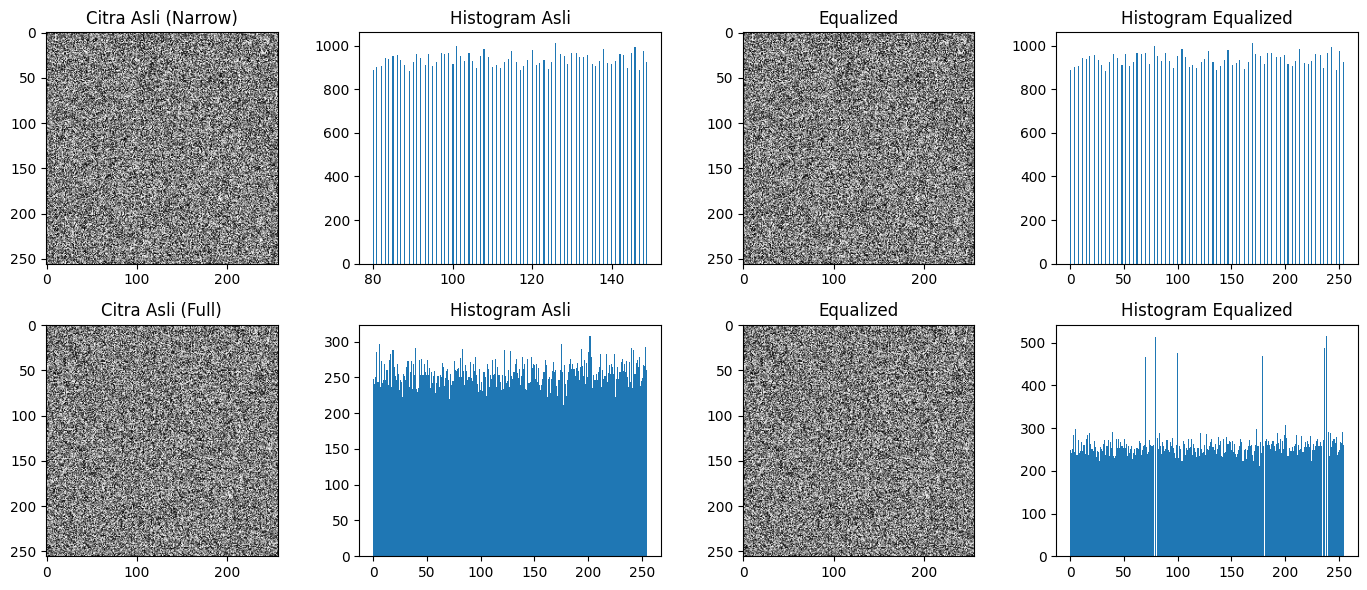

In [15]:
img_narrow = np.random.randint(80, 150, (256,256), dtype=np.uint8)  # range sempit
img_full   = np.random.randint(0, 256, (256,256), dtype=np.uint8)   # range penuh

# Histogram equalization
eq_narrow = cv.equalizeHist(img_narrow)
eq_full   = cv.equalizeHist(img_full)

# Tampilkan hasil
fig, axs = plt.subplots(2,4, figsize=(14,6))
axs[0,0].imshow(img_narrow, cmap='gray'); axs[0,0].set_title('Citra Asli (Narrow)')
axs[0,1].hist(img_narrow.ravel(), bins=256); axs[0,1].set_title('Histogram Asli')
axs[0,2].imshow(eq_narrow, cmap='gray'); axs[0,2].set_title('Equalized')
axs[0,3].hist(eq_narrow.ravel(), bins=256); axs[0,3].set_title('Histogram Equalized')

axs[1,0].imshow(img_full, cmap='gray'); axs[1,0].set_title('Citra Asli (Full)')
axs[1,1].hist(img_full.ravel(), bins=256); axs[1,1].set_title('Histogram Asli')
axs[1,2].imshow(eq_full, cmap='gray'); axs[1,2].set_title('Equalized')
axs[1,3].hist(eq_full.ravel(), bins=256); axs[1,3].set_title('Histogram Equalized')
plt.tight_layout()
plt.show()


2. **Normalisasi Histogram**  
   Sebuah citra grayscale memiliki ukuran 256x256 dengan distribusi intensitas yang condong ke kiri (dominan gelap).  
   • Analisis bagaimana normalisasi histogram dapat digunakan untuk perbaikan visual.  
   • Bandingkan hasilnya dengan histogram equalization dalam konteks pelestarian informasi detail pada area gelap.  

   **Jawaban:**

   Normalisasi Histogram Citra grayscale 256x256 dengan distribusi intensitas condong ke kiri berarti mayoritas piksel berada di area gelap. Normalisasi histogram akan menggeser dan meregangkan nilai intensitas sehingga area gelap menjadi lebih terang dan detail di area tersebut muncul lebih jelas. Ini meningkatkan keterbacaan visual tanpa mengubah hubungan relatif antar intensitas secara drastis. Dibandingkan dengan histogram equalization, normalisasi lebih konservatif: ia menjaga struktur dan detail lokal di area gelap dengan lebih baik, sementara equalization cenderung lebih agresif dan bisa menyebabkan kehilangan detail halus akibat redistribusi global intensitas.


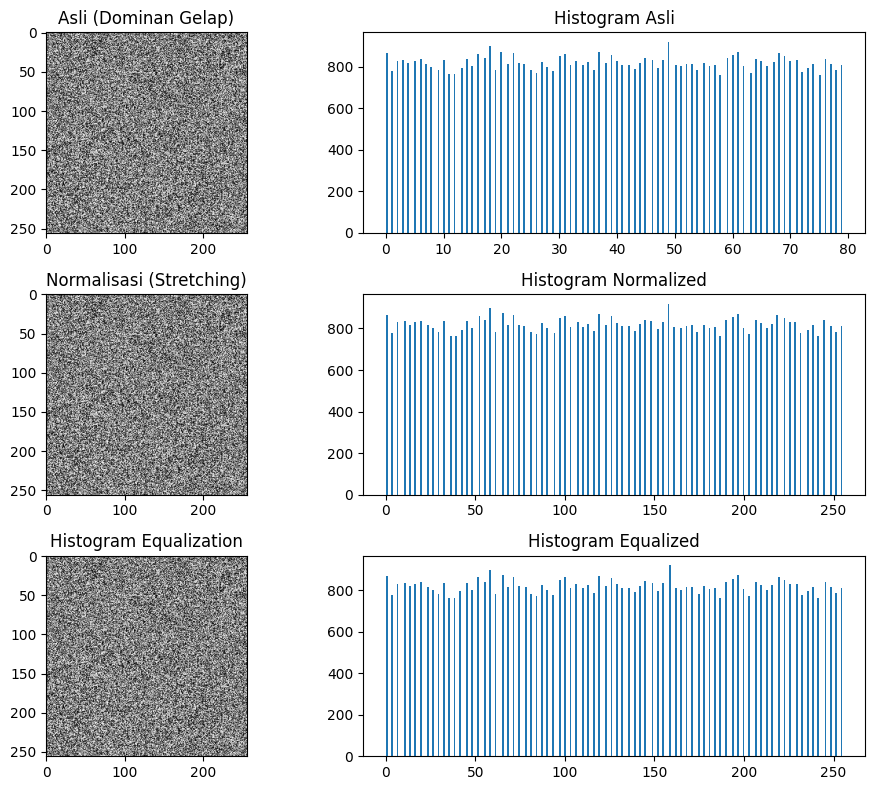

In [16]:
# Citra sintetis dominan gelap
img_dark = np.random.randint(0, 80, (256,256), dtype=np.uint8)

# Normalisasi (kontras stretching)
norm_img = cv.normalize(img_dark, None, 0, 255, cv.NORM_MINMAX)
eq_img   = cv.equalizeHist(img_dark)

# Plot perbandingan
fig, axs = plt.subplots(3,2, figsize=(10,8))
axs[0,0].imshow(img_dark, cmap='gray'); axs[0,0].set_title('Asli (Dominan Gelap)')
axs[0,1].hist(img_dark.ravel(), bins=256); axs[0,1].set_title('Histogram Asli')

axs[1,0].imshow(norm_img, cmap='gray'); axs[1,0].set_title('Normalisasi (Stretching)')
axs[1,1].hist(norm_img.ravel(), bins=256); axs[1,1].set_title('Histogram Normalized')

axs[2,0].imshow(eq_img, cmap='gray'); axs[2,0].set_title('Histogram Equalization')
axs[2,1].hist(eq_img.ravel(), bins=256); axs[2,1].set_title('Histogram Equalized')
plt.tight_layout()
plt.show()

3. **Dithering dan Error Diffusion**  
   Anda diminta mengonversi sebuah citra 8-bit grayscale menjadi citra biner untuk dicetak menggunakan printer monokrom.  
   • Bandingkan kualitas hasil cetak menggunakan metode Ordered Dithering dan Floyd-Steinberg Error Diffusion.  
   • Analisis kondisi apa yang membuat satu metode lebih unggul dibanding lainnya (misalnya detail tepi, area gradasi halus).

   **Jawaban:**
   
   Dithering dan Error Diffusion Pada konversi citra 8-bit ke biner untuk printer monokrom, metode Ordered Dithering menggunakan pola tetap (misalnya matriks Bayer). Hasilnya stabil dan terkontrol, cocok untuk area tekstur seragam, tetapi sering menghasilkan pola berulang yang terlihat seperti “grid” pada cetakan. Floyd-Steinberg Error Diffusion menyebarkan kesalahan kuantisasi ke piksel tetangga secara adaptif, sehingga hasilnya lebih alami dan halus, terutama pada gradasi lembut atau tepi objek. Namun, metode ini lebih sensitif terhadap noise dan memerlukan komputasi lebih tinggi. Secara umum, Ordered Dithering unggul pada cetak dengan resolusi rendah atau area tekstur konstan, sementara Floyd-Steinberg lebih unggul untuk citra dengan banyak detail dan gradasi halus.

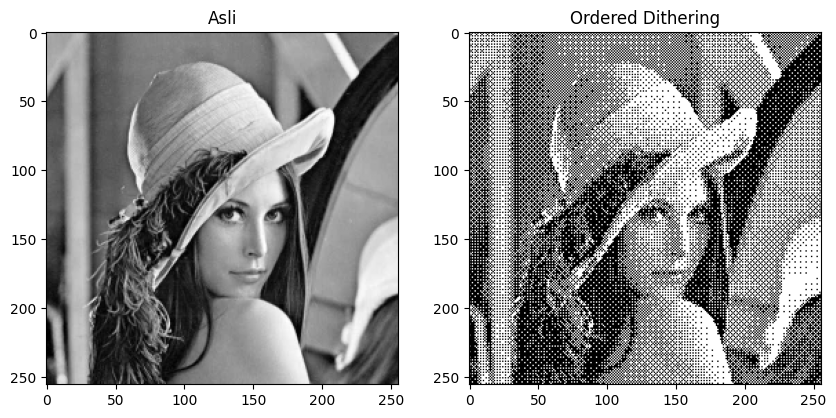

In [18]:
def ordered_dithering(img):
    bayer = np.array([
        [ 0,  8,  2, 10],
        [12,  4, 14,  6],
        [ 3, 11,  1,  9],
        [15,  7, 13,  5]
    ], dtype=np.float32) / 16.0

    h, w = img.shape
    out = np.zeros_like(img)
    for y in range(h):
        for x in range(w):
            threshold = bayer[y % 4, x % 4] * 255
            out[y,x] = 255 if img[y,x] > threshold else 0
    return out

img_gray = cv.imread('/content/drive/MyDrive/PCVK/Week5/lena.jpg', cv.IMREAD_GRAYSCALE)
img_gray = cv.resize(img_gray, (256,256))
ordered = ordered_dithering(img_gray)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(img_gray, cmap='gray'); plt.title('Asli')
plt.subplot(1,2,2); plt.imshow(ordered, cmap='gray'); plt.title('Ordered Dithering')
plt.show()

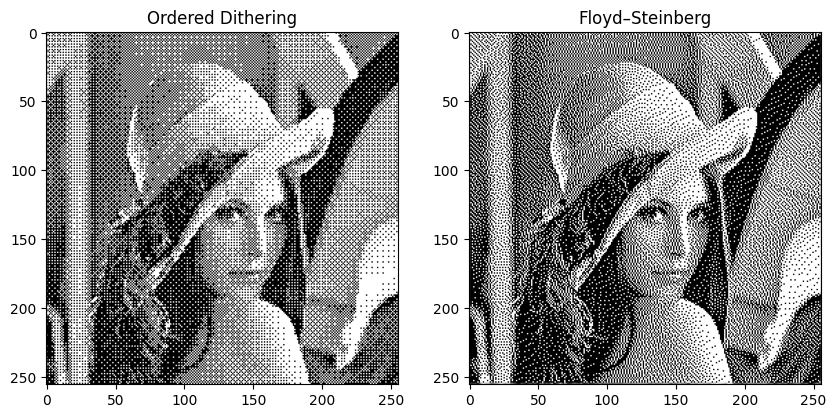

In [19]:
def floyd_steinberg(img):
    img = img.astype(np.float32)
    h, w = img.shape
    for y in range(h-1):
        for x in range(1, w-1):
            old = img[y,x]
            new = 255 if old > 127 else 0
            err = old - new
            img[y,x] = new
            img[y,  x+1] += err * 7/16
            img[y+1,x-1] += err * 3/16
            img[y+1,x  ] += err * 5/16
            img[y+1,x+1] += err * 1/16
    return np.clip(img, 0, 255).astype(np.uint8)

fs = floyd_steinberg(img_gray)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(ordered, cmap='gray'); plt.title('Ordered Dithering')
plt.subplot(1,2,2); plt.imshow(fs, cmap='gray'); plt.title('Floyd–Steinberg')
plt.show()
